<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Allan_Braquiel_Imers%C3%A3o_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio Final - Imersão Dados

Semana de imersão em dados realizado pela Alura, com a finalidade de transmitir conhecimento em Data Science, realizando análise sobre uma amostra do conjunto de dados do ENEM 2019.

Esta análise tem por objetivo de ralizar uma análise detalhada sobre a situação do ensino médio no Brasil e criar um modelo de Machine Learning para prever a nota de Matemática em um eventual cenário onde são apresentadas somente as notas de Linguagens, Ciências da Natureza, Ciências Humanas e Redação.

Dessa forma, apresentaremos diversos algoritmos que podem colaborar com esta previsão

---



Importando as bibliotecas que serão necessárias para a análise exploratória

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Carregando uma amostra aleatória dos dados

In [ ]:
url = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

df = pd.read_csv(url)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


Aqui podemos ver um resumo sobre os tipos de dado contidos neste dataset de uma forma geral, onde são apresentadas 136 colunas, distribuídas em 24 do tipo float, 71 do tipo int e 41 do tipo object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


Os nomes de todas as colunas estão em letra maiúscula, para contribuir com a digitação todas serão transformadas em minúsculas

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns.values

array(['nu_inscricao', 'nu_ano', 'co_municipio_residencia',
       'no_municipio_residencia', 'co_uf_residencia', 'sg_uf_residencia',
       'nu_idade', 'tp_sexo', 'tp_estado_civil', 'tp_cor_raca',
       'tp_nacionalidade', 'co_municipio_nascimento',
       'no_municipio_nascimento', 'co_uf_nascimento', 'sg_uf_nascimento',
       'tp_st_conclusao', 'tp_ano_concluiu', 'tp_escola', 'tp_ensino',
       'in_treineiro', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc',
       'tp_dependencia_adm_esc', 'tp_localizacao_esc', 'tp_sit_func_esc',
       'in_baixa_visao', 'in_cegueira', 'in_surdez',
       'in_deficiencia_auditiva', 'in_surdo_cegueira',
       'in_deficiencia_fisica', 'in_deficiencia_mental',
       'in_deficit_atencao', 'in_dislexia', 'in_discalculia',
       'in_autismo', 'in_visao_monocular', 'in_outra_def', 'in_gestante',
       'in_lactante', 'in_idoso', 'in_estuda_classe_hospitalar',
       'in_sem_recurso', 'in_braille', 'in_ampliada_24

Verificando a quantidade de registros de inscritos por estado

In [ ]:
df.sg_uf_residencia.value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: sg_uf_residencia, dtype: int64

Verificando a quantidade de inscritos por idade, ordenados pela quantidade, da maior para menor

In [ ]:
df.nu_idade.value_counts().sort_values(ascending=False)

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: nu_idade, Length: 65, dtype: int64

Agora ordenado pelo idade, do mais novo para o mais velho

In [ ]:
df.nu_idade.value_counts().sort_index().head(10)

13        4
14      141
15     2009
16     7830
17    21256
18    21452
19    14418
20    10413
21     7267
22     5924
Name: nu_idade, dtype: int64

Distribuição das idades atrvés de um histograma

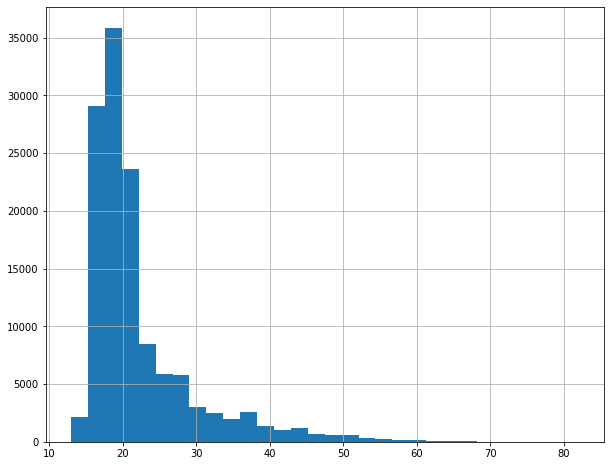

In [ ]:
df.nu_idade.hist(bins=30, figsize=(10, 8))

Existem alguns inscritos que são treineiros, ou seja, não desejam concorrer a vagas em universidades, estão realizando as provas somente com a finalidade de treinar para o momento em que realmente forem entrar para o curso superior.

In [ ]:
print(f"Treineiros: {df.in_treineiro.value_counts()[1]}")
print(f"Não treineiros: {df.in_treineiro.value_counts()[0]}")

Treineiros: 15401
Não treineiros: 111979


Aqui podemos ver a quantidade de treineiros por idade

In [ ]:
df.query("in_treineiro == 1")["nu_idade"].value_counts().sort_index().head()

14      64
15    1927
16    7142
17    4901
18     858
Name: nu_idade, dtype: int64

Para podermos analisar as notas dos inscritos, é necessário que haja uma separação dessa notas no restante do conjunto de dados, sem que seja realizada qualquer alteração no dataset original, para isso criaremos uma lista com o nome das notas

In [ ]:
notas = ["nu_nota_cn","nu_nota_ch","nu_nota_lc","nu_nota_mt","nu_nota_redacao"]

df[notas].describe()

,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
count,92758.000000,98043.000000,98043.000000,92758.000000,98043.000000
mean,477.964015,507.365912,520.463928,523.555206,571.570025
std,76.296099,82.972839,64.556578,109.416939,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,483.700000,435.300000,480.000000
50%,470.200000,510.900000,526.100000,501.600000,580.000000
75%,533.300000,567.100000,565.100000,598.200000,680.000000
max,797.300000,809.400000,801.700000,985.000000,1000.000000


Estes histogramas mostram como as ntas estão distribuidas entre os inscritos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec5b15898>,
      dtype=object)

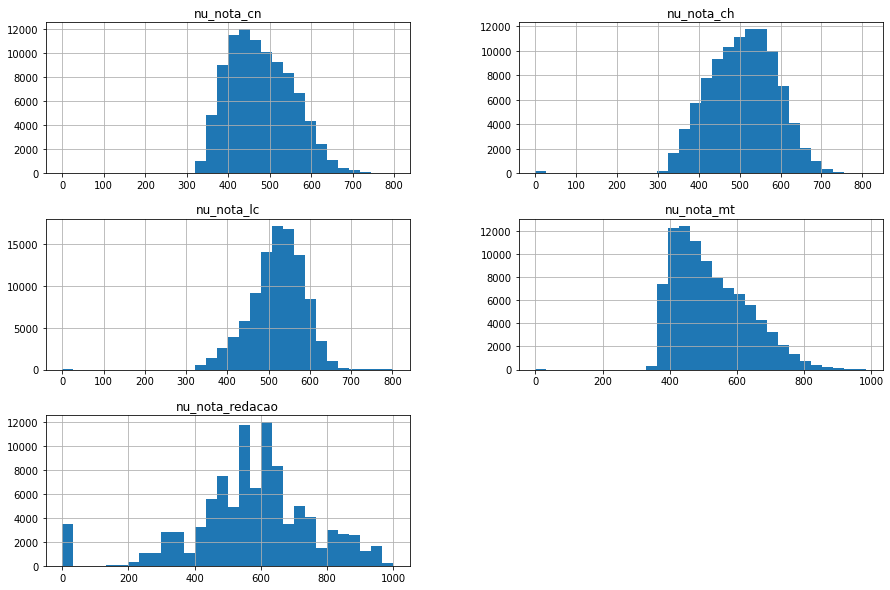

In [ ]:
df[notas].hist(bins=30, figsize=(15,10))

In [ ]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

plt.style.use("fivethirtyeight")

Distribuição das notas com gráfico de densidade

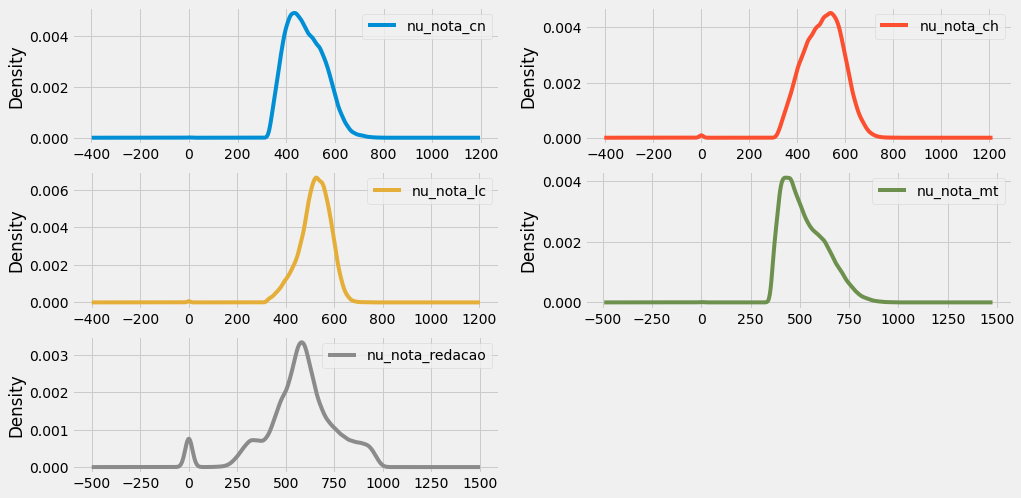

In [ ]:
df[notas].plot(kind = 'density', subplots = True, layout = (3,2), sharex = False)
plt.show()

Distribuição das notas com boxplot

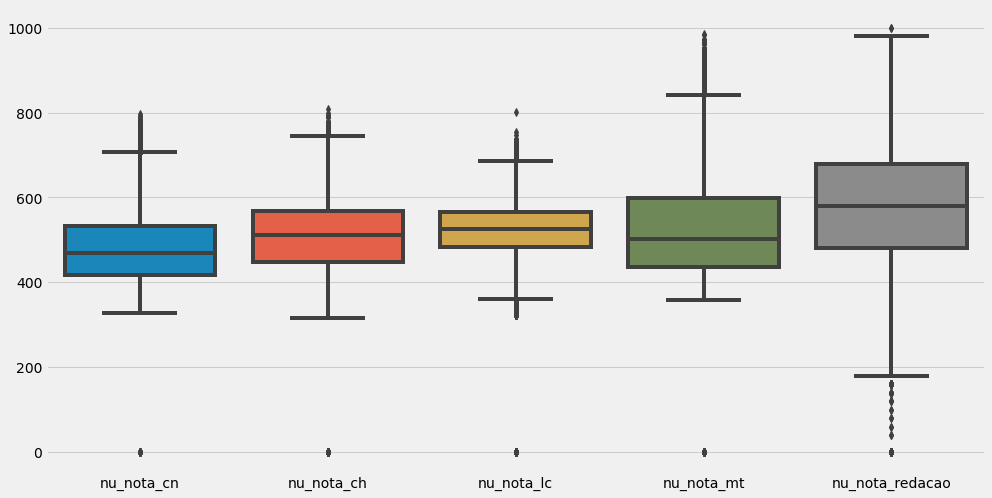

In [ ]:
sns.boxplot(data = df[notas], orient= 'v')

Proporção dos inscritos por idade

In [ ]:
df.nu_idade.value_counts(normalize=True).sort_values(ascending=False).head(10)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
21    0.057050
22    0.046507
23    0.036646
24    0.030130
25    0.024556
Name: nu_idade, dtype: float64

Após uma breve análise podemos identificar que 51% dos inscritos tem idade entre 18 e 20 anos

Existem alguns inscritos que tem 13 anos, a menor idade apresentada neste conjunto de dados, vejamos onde foram inscritos

In [ ]:
df.query("nu_idade == 13")[["sg_uf_residencia", "no_municipio_residencia"]]

,sg_uf_residencia,no_municipio_residencia
57359,SP,Atibaia
95630,MT,Rondonópolis
98197,AP,Macapá
116501,BA,Jacobina


Expandindo um pouco a idade até 14 anos existem um quantidade maior de registros

In [ ]:
menor_14 = df.query("nu_idade <= 14")

In [ ]:
print(f"Qauntidade de inscritos com idade igual ou menor a 14 anos: {len(menor_14)}")

Qauntidade de inscritos com idade igual ou menor a 14 anos: 145


De onde são?

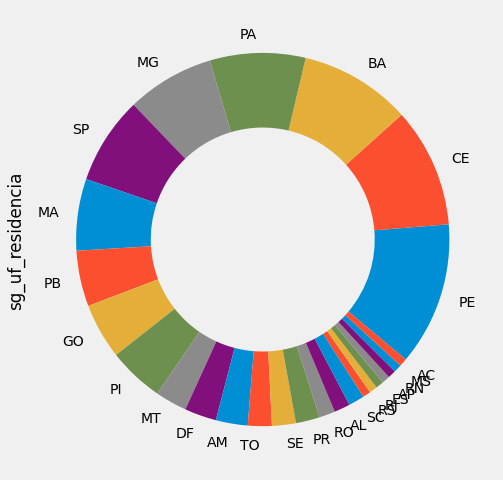

In [ ]:
menor_14.sg_uf_residencia.value_counts().plot.pie(wedgeprops=dict(width=0.4), startangle=-40)

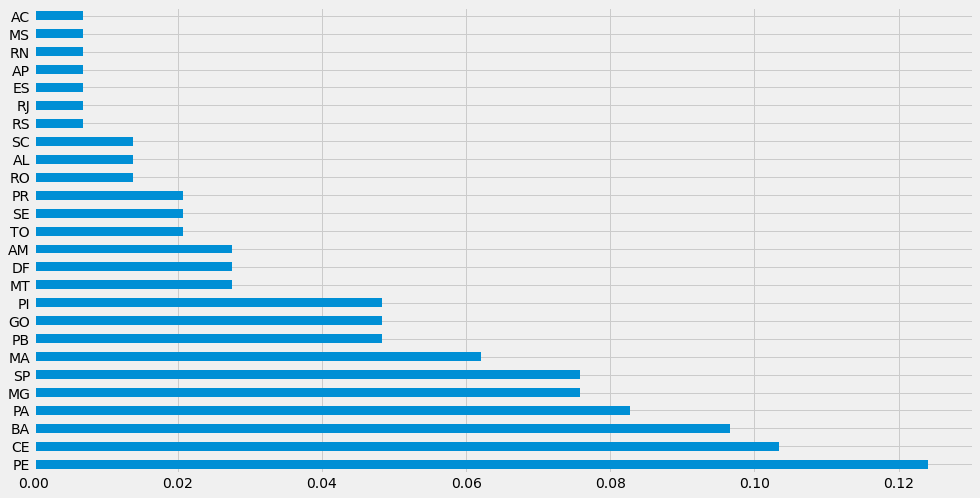

In [ ]:
menor_14.sg_uf_residencia.value_counts(normalize=True).plot.barh()

Outro aspecto que deve ser analisado é a distribuição das notas de acordo com a renda média da família de cada inscrito

Text(0.5, 1.0, 'Distribuição das notas de matemática pela renda')

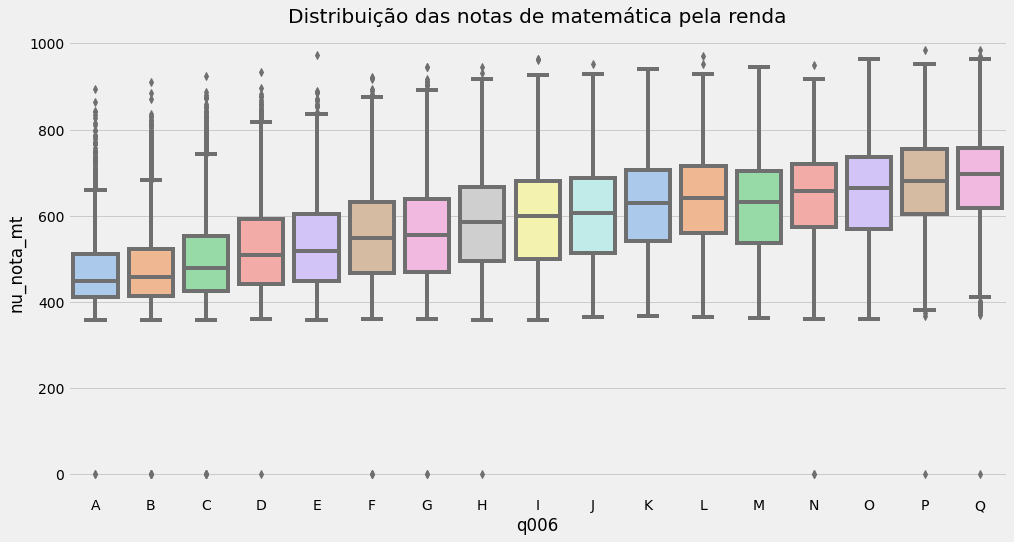

In [ ]:
renda_ordendada = df.q006.unique()
renda_ordendada.sort()

#plt.figure(figsize=(10, 8))
sns.boxplot(x = "q006", y = "nu_nota_mt", data = df, order = renda_ordendada, palette="pastel")
plt.title("Distribuição das notas de matemática pela renda")

Para ajudar na análise iremos construir uma nova coluna com a soma das notas de linguagens, matemática, ciências da natureza, ciências humanas e redação

In [ ]:
df["total_nota"] = df[notas].sum(axis=1)
df.head()

,nu_inscricao,nu_ano,co_municipio_residencia,no_municipio_residencia,co_uf_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,co_municipio_nascimento,no_municipio_nascimento,co_uf_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,...,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,total_nota
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Distribuição do total das notas pela renda')

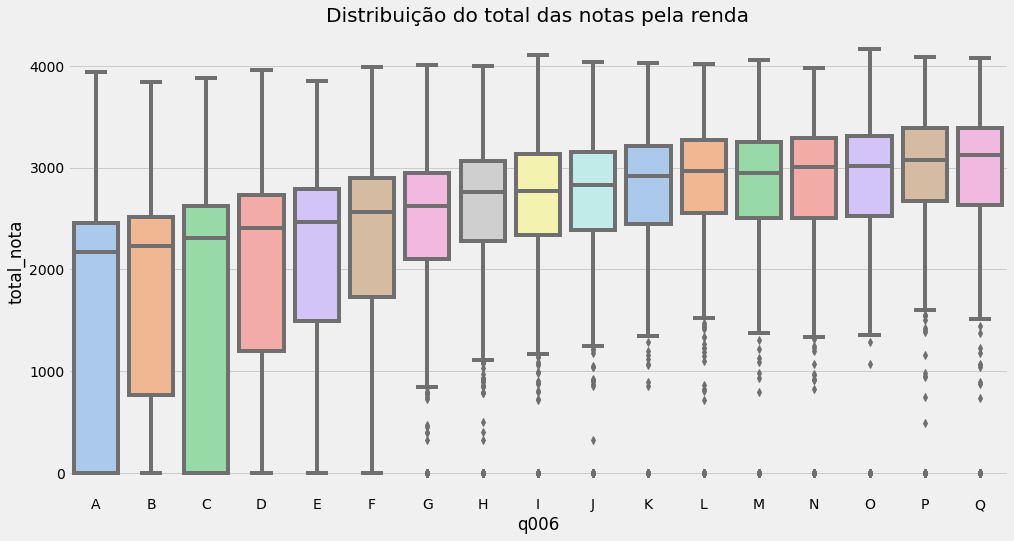

In [ ]:
sns.boxplot(x = "q006", y = "total_nota", data = df, order = renda_ordendada, palette="pastel")
plt.title("Distribuição do total das notas pela renda")

De acordo com este gráfico exitem muitos inscritos que apresentam nota zero, neste caso é preciso identificar estes registros e tomar uma decisão sobre eles

In [ ]:
notas.append("total_nota")

df[notas].query("total_nota == 0")

,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,total_nota
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Agora que foram identificados estes registros serão excluídos para que não prejudique nossa análise

In [ ]:
df_sem_zero = df.query("total_nota != 0")
df_sem_zero.head()

,nu_inscricao,nu_ano,co_municipio_residencia,no_municipio_residencia,co_uf_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,co_municipio_nascimento,no_municipio_nascimento,co_uf_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,...,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,total_nota
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Distribuição do total das notas pela renda')

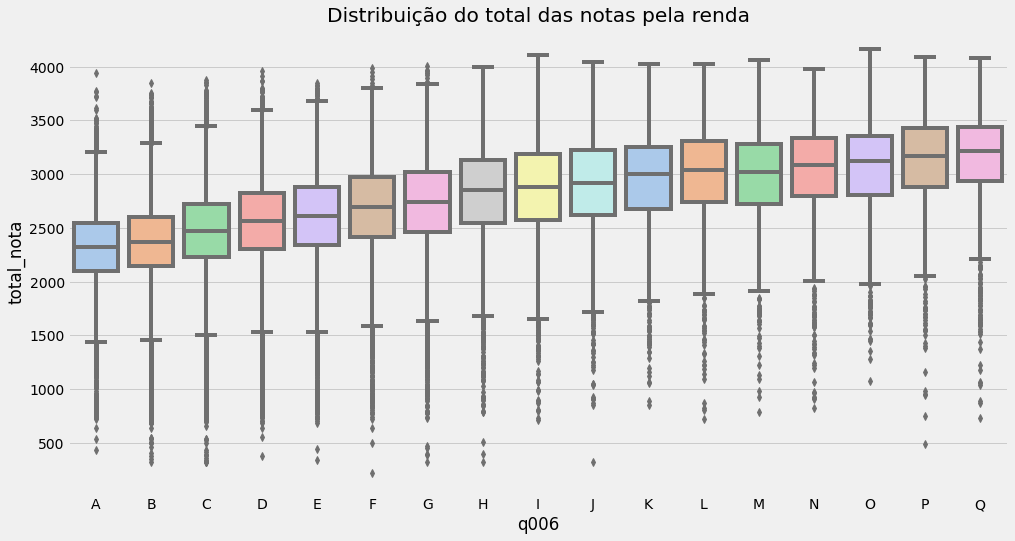

In [ ]:
sns.boxplot(x = "q006", y = "total_nota", data = df_sem_zero, order = renda_ordendada, palette="pastel")
plt.title("Distribuição do total das notas pela renda")

Este gráfico mostra a distribuição do total das notas pela renda familiar, separando os treineiros dos não treineiros

Text(0.5, 1.0, 'Distribuição do total das notas pela renda')

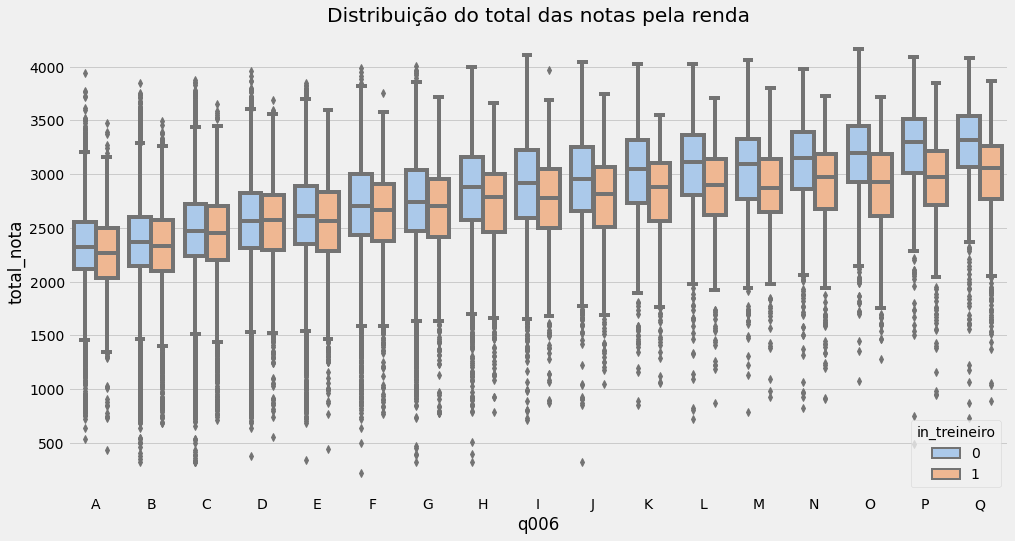

In [ ]:
sns.boxplot(x = "q006", y = "total_nota", data = df_sem_zero, order = renda_ordendada, palette="pastel", hue="in_treineiro")
plt.title("Distribuição do total das notas pela renda")

In [ ]:
zero = df.query("total_nota == 0")["total_nota"].count()
print(f"Total de inscritos que tiveram sua nota zerada: {zero}")

Total de inscritos que tiveram sua nota zerada: 29162


In [ ]:
eliminado = df.query("total_nota == 0 and tp_presenca_cn == 2 or tp_presenca_ch == 2 or tp_presenca_lc == 2 or tp_presenca_mt == 2")["total_nota"].count()
print(f"Eiminados: {eliminado}")

Eiminados: 178


Proporção dos participantes de rendas mais altas e mais baixas como treineiros e não treneiros

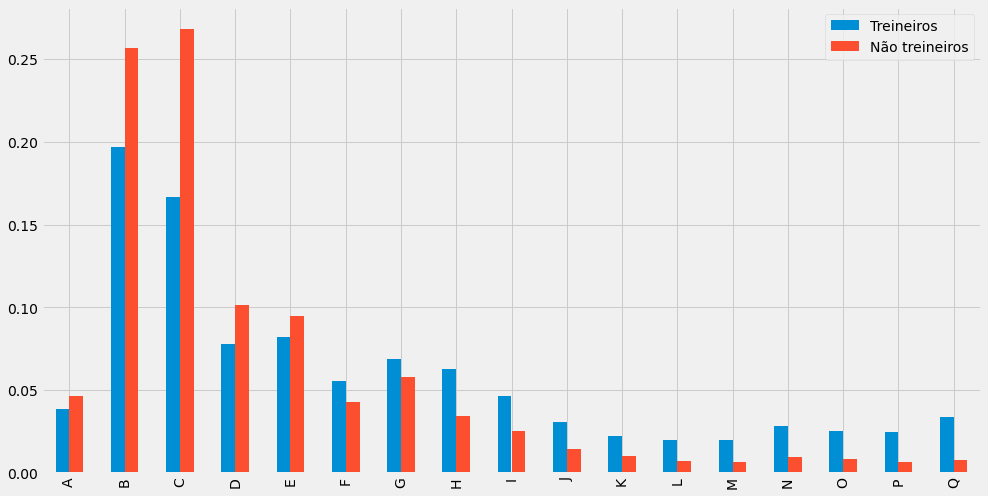

In [ ]:
df_treineiro = df.query("in_treineiro == 1")["q006"].value_counts(normalize=True)
df_nao_treineiro = df.query("in_treineiro == 0")["q006"].value_counts(normalize=True)

df6 = pd.DataFrame({"Treineiros": df_treineiro, "Não treineiros": df_nao_treineiro})

df6.plot.bar()

Distribuição das notas de inscrits que tem ou não acesso a internet

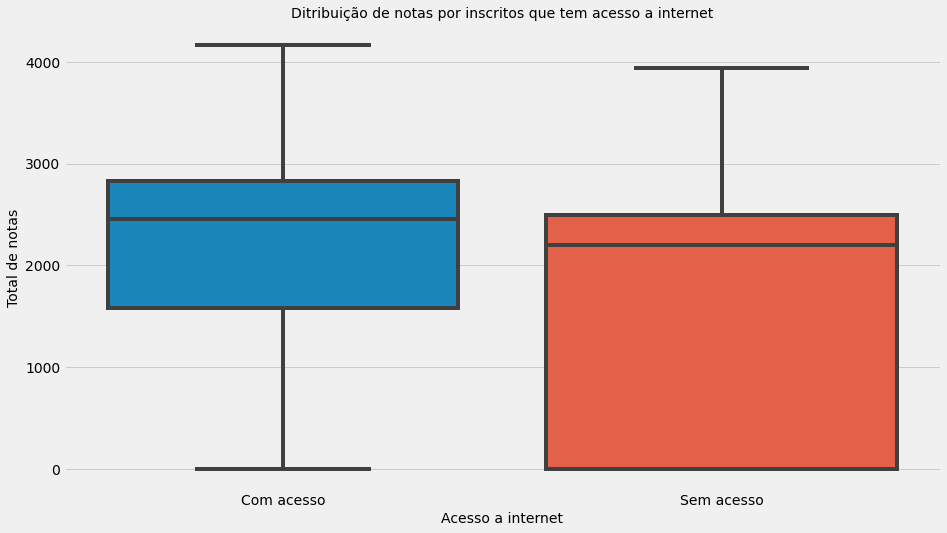

In [ ]:
ax = sns.boxplot(x="q025", y="total_nota", data=df)

ax.figure.set_size_inches(14, 8)
ax.set_title("Ditribuição de notas por inscritos que tem acesso a internet", fontsize=14)
ax.set_xlabel("Acesso a internet", fontsize= 14)
ax.set_ylabel("Total de notas", fontsize = 14)
ax.set_xticklabels(["Com acesso", "Sem acesso"], fontsize=14)
ax

Distribuição das notas entre os que tem acesso ou não a internet

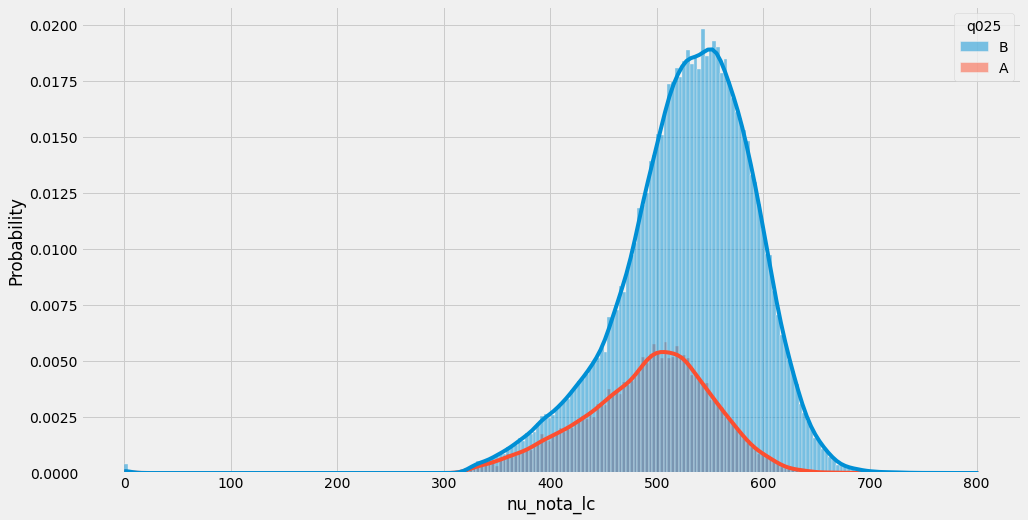

In [ ]:
sns.histplot(df_sem_zero, x="nu_nota_lc", hue="q025", kde=True, stat="probability")

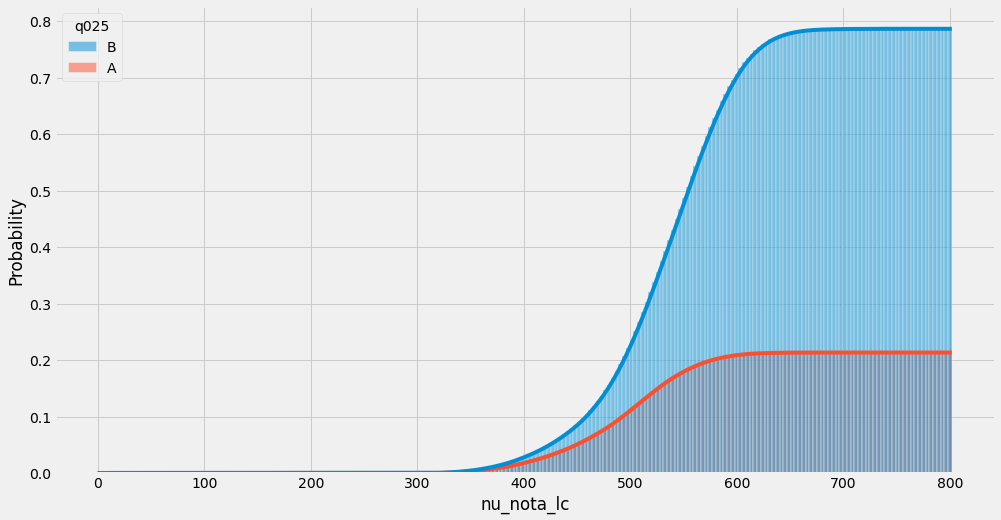

In [ ]:
sns.histplot(df_sem_zero, x="nu_nota_lc", hue="q025", kde=True, stat="probability", cumulative=True)

Verificando a correlação que as notas tem entre si

In [ ]:
correlacao = df_sem_zero[notas].corr()
correlacao

,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,total_nota
nu_nota_cn,1.000000,0.668979,0.641624,0.649527,0.504740,0.785600
nu_nota_ch,0.668979,1.000000,0.744170,0.610332,0.528338,0.735534
nu_nota_lc,0.641624,0.744170,1.000000,0.587710,0.535797,0.711686
nu_nota_mt,0.649527,0.610332,0.587710,1.000000,0.493046,0.790051
nu_nota_redacao,0.504740,0.528338,0.535797,0.493046,1.000000,0.783647
total_nota,0.785600,0.735534,0.711686,0.790051,0.783647,1.000000


Text(0.5, 1.0, 'Correlação entre as notas')

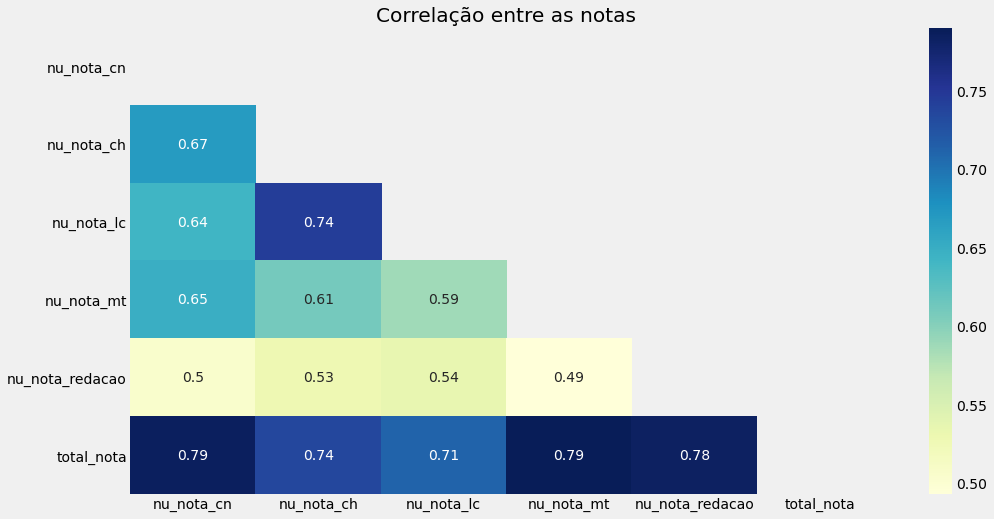

In [ ]:
mask = np.triu(np.ones_like(correlacao, dtype=np.bool))
heatmap = sns.heatmap(correlacao, annot=True, cmap="YlGnBu", mask=mask)
heatmap.set_title("Correlação entre as notas")

Media, Moda e Mediana das notas

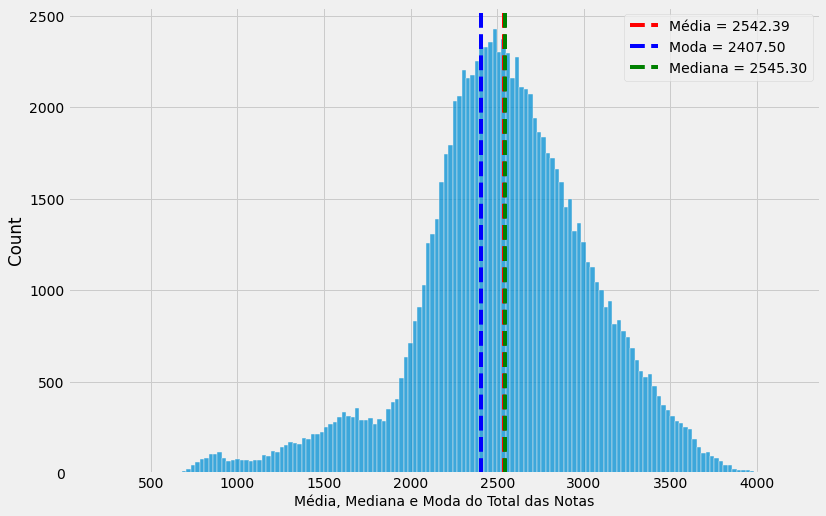

In [ ]:
plt.figure(figsize=(12, 8))
media = df_sem_zero["total_nota"].mean()
moda = df_sem_zero["total_nota"].mode()[0]
mediana = df_sem_zero["total_nota"].median()

ax = sns.histplot(df_sem_zero, x="total_nota")
plt.axvline(media, c="red", linestyle="--", label="Média = {:.2f}".format(media))
plt.axvline(moda, c="blue", linestyle="--", label="Moda = {:.2f}".format(moda))
plt.axvline(mediana, c="green", linestyle="--", label="Mediana = {:.2f}".format(mediana))
plt.xlabel("Média, Mediana e Moda do Total das Notas", fontsize=14)
plt.legend()

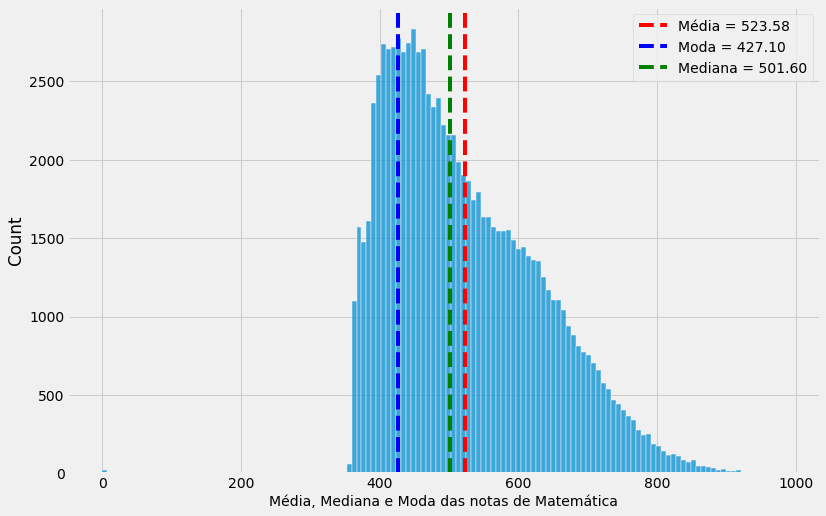

In [ ]:
plt.figure(figsize=(12, 8))
media = df_sem_zero["nu_nota_mt"].mean()
moda = df_sem_zero["nu_nota_mt"].mode()[0]
mediana = df_sem_zero["nu_nota_mt"].median()

ax = sns.histplot(df_sem_zero, x="nu_nota_mt")
plt.axvline(media, c="red", linestyle="--", label="Média = {:.2f}".format(media))
plt.axvline(moda, c="blue", linestyle="--", label="Moda = {:.2f}".format(moda))
plt.axvline(mediana, c="green", linestyle="--", label="Mediana = {:.2f}".format(mediana))
plt.xlabel("Média, Mediana e Moda das notas de Matemática", fontsize=14)
plt.legend()

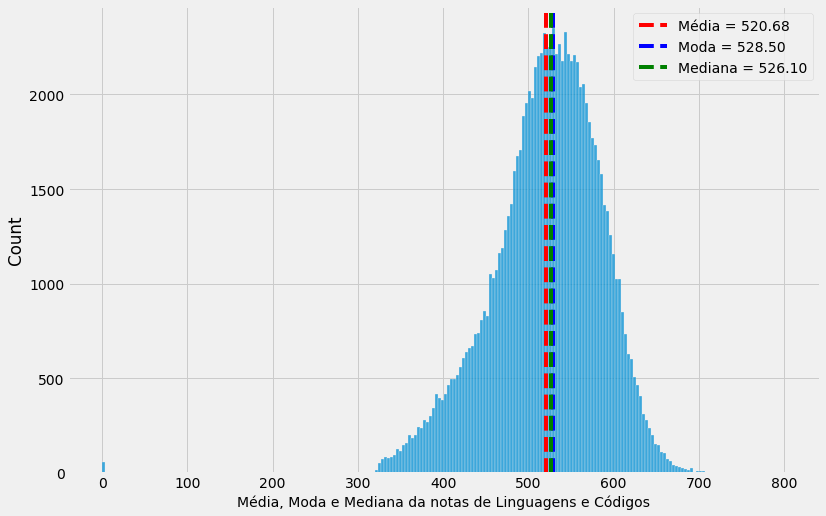

In [ ]:
plt.figure(figsize=(12, 8))
media = df_sem_zero["nu_nota_lc"].mean()
moda = df_sem_zero["nu_nota_lc"].mode()[0]
mediana = df_sem_zero["nu_nota_lc"].median()

ax = sns.histplot(df_sem_zero, x="nu_nota_lc")
plt.axvline(media, c="red", linestyle="--", label="Média = {:.2f}".format(media))
plt.axvline(moda, c="blue", linestyle="--", label="Moda = {:.2f}".format(moda))
plt.axvline(mediana, c="green", linestyle="--", label="Mediana = {:.2f}".format(mediana))
plt.xlabel("Média, Moda e Mediana da notas de Linguagens e Códigos", fontsize=14)
plt.legend()

## Definindo o modelo de Machine Learning

Separando os features do target

In [ ]:
notas_entrada = ["nu_nota_redacao", "nu_nota_cn", "nu_nota_ch", "nu_nota_lc"]
notas_saida = "nu_nota_mt"
df_sem_zero = df_sem_zero[notas].dropna()
X = df_sem_zero[notas_entrada]
y = df_sem_zero[notas_saida]

In [ ]:
X.head()

,nu_nota_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc
0,420.0,435.6,512.3,488.6
2,560.0,423.2,499.1,441.0
3,500.0,426.2,578.1,551.5
4,780.0,516.5,571.3,511.2
5,900.0,559.6,618.7,607.5


In [ ]:
y.head()

0    432.4
2    427.2
3    499.9
4    424.5
5    615.6
Name: nu_nota_mt, dtype: float64

In [ ]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (92537, 4)
y: (92537,)


Importando as bibliotecas do Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

Selecionando o modelo preditivo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (64775, 4)
x test:  (27762, 4)
y train:  (64775,)
y test:  (27762,)


In [ ]:
modelo_linear_regression = LinearRegression()
modelo_linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_regression = modelo_linear_regression.predict(x_test)

In [ ]:
modelo_decision_tree = DecisionTreeRegressor()
modelo_decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
decision_tree = modelo_decision_tree.predict(x_test)

In [ ]:
modelo_random_forest = RandomForestRegressor()
modelo_random_forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
random_forest = modelo_random_forest.predict(x_test)

Criando um dataframe para armazenar os resultados

In [ ]:
resultado = pd.DataFrame()

In [ ]:
resultado["valor_real"] = y_test.values
resultado["linear_regression"] = linear_regression
resultado["decision_tree"] = decision_tree
resultado["random_forest"] = random_forest

In [ ]:
resultado.head()

,valor_real,linear_regression,decision_tree,random_forest
0,488.9,549.584792,461.4,499.928
1,571.4,525.586458,655.4,525.377
2,374.6,458.118024,484.0,456.419
3,687.3,623.767608,590.0,585.134
4,588.4,630.440432,676.6,661.089


In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.linear_regression,
                         mode='lines',
                         line = dict(color = '#FEBFB3'),
                         name='Valor Predito Regressão Linear'))

fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.decision_tree,
                         mode='lines',
                         line = dict(color = 'yellow'),
                         name='Valor Predito Decision Tree'))

fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.random_forest,
                         mode='lines',
                         line = dict(color = 'red'),
                         name='Valor Predito Random Forest'))

# Plota a figura
fig.show()

# Conclusão

Seria necessãrio mais tempo para analisar mais algoritmos testar novos parâmetros e calcular outras metricas para uma conclusão mais acertiva